In [4]:
import pandas as pd
import numpy as np
import os
from utils import loadTabular, loadSequential, dumpCleanedSequential, dumpTabular, testCleanedTabular
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb

tabular_train, labels = loadTabular()
tabular_test = loadTabular(isTest=True)
sequences_train = loadSequential()
sequences_test = loadSequential(isTest=True)

In [2]:
isna_train = tabular_train.isna().sum()/tabular_train.shape[0]
isna_test = tabular_test.isna().sum()/tabular_test.shape[0]

In [3]:
 cleanest_indices = isna_train[isna_train<0.25].index

In [4]:
imp = IterativeImputer()
shrinkened = tabular_train[cleanest_indices].copy()
imp.fit(shrinkened)

IterativeImputer()

In [9]:
train_cleaned = tabular_train.copy()
train_cleaned[cleanest_indices] = pd.DataFrame(imp.transform(shrinkened), columns=cleanest_indices)
next_indices = isna_train[(isna_train>0.25) & (isna_train<0.6)].index

In [10]:
next_indices.shape

(328,)

In [55]:
from copy import deepcopy
new_cleaned = deepcopy(list(cleanest_indices))
next_step_cleaned = train_cleaned.copy()

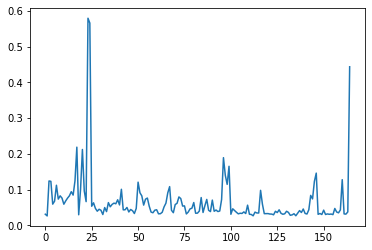

In [56]:
losses = []
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output
for idx, column in enumerate(next_indices):
    y = tabular_train[column]
    X = next_step_cleaned[new_cleaned].iloc[y[y.notna()].index]
    y = y[y.notna()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
    clf = xgb.XGBRegressor()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    loss = mean_squared_error(y_test, pred)
    if loss < 1:
        losses.append(loss)
        next_step_cleaned[column] = clf.predict(next_step_cleaned[new_cleaned])
        new_cleaned.append(column)
    if not (idx+1)%3:
        clear_output()
        plt.plot(losses)
        plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(next_step_cleaned, labels-1, test_size=0.25, shuffle=True)
testCleanedTabular(X_train, X_test, y_train, y_test)

C:\Users\Antoni Kowalczuk\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cleaned dataset accuracy score: 0.69913


In [61]:
sth = train_cleaned[new_cleaned]
X_train, X_test, y_train, y_test = train_test_split(tabular_train, labels-1, test_size=0.25, shuffle=True)
del sth
testCleanedTabular(X_train, X_test, y_train, y_test)

C:\Users\Antoni Kowalczuk\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cleaned dataset accuracy score: 0.77367


In [62]:
sth = train_cleaned[new_cleaned]
sth.shape

(7352, 350)

In [99]:
X_train = np.concatenate((sequences_train.reshape(tabular_train.shape[0], -1), tabular_train), axis=1)
clf = xgb.XGBClassifier(use_label_encoder=False)
clf.fit(X_train, labels-1)

[17:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'f1280', 'f1281', 'f1282', 'f1283', 'f1284', 'f1285', 'f1286', 'f1287', 'f1288', 'f1289', 'f1290', 'f1291', 'f1292', 'f1293', 'f1294', 'f1295', 'f1296', 'f1297', 'f1298', 'f1299', 'f1300', 'f1301', 'f1302', 'f1303', 'f1304', 'f1305', 'f1306', 'f1307', 'f1308', 'f1309', 'f1310', 'f1311', 'f1312', 'f1313', 'f1314', 'f1315', 'f1316', 'f1317', 'f1318', 'f1319', 'f1320', 'f1321', 'f1322', 'f1323', 'f1324', 'f1325', 'f1326', 'f1327', 'f1328', 'f1329', 'f1330', 'f1331', 'f1332', 'f1333', 'f1334', 'f1335', 'f1336', 'f1337', 'f1338', 'f1339', 'f1340', 'f1341', 'f1342', 'f1343', 'f1344', 'f1345', 'f1346', 'f1347', 'f1348', 'f1349', 'f1350', 'f1351', 'f1352', 'f1353', 'f1354', 'f1355', 'f1356', 'f1357', 'f1358', 'f1359', 'f1360', 'f1361', 'f1362', 'f1363', 'f1364', 'f1365', 'f1366', 'f1367', 'f1368', 'f1369', 'f1370', 'f1371', 'f1372', 'f1373', 'f1374', 'f1375', 'f1376', 'f1377', 'f1378', 'f1379', 'f1380', 'f1381', 'f1382', 'f1383', 'f1384', 'f1385', 'f1386', 'f1387', 'f1388', 'f1389', 'f1390', 'f1391', 'f1392', 'f1393', 'f1394', 'f1395', 'f1396', 'f1397', 'f1398', 'f1399', 'f1400', 'f1401', 'f1402', 'f1403', 'f1404', 'f1405', 'f1406', 'f1407', 'f1408', 'f1409', 'f1410', 'f1411', 'f1412', 'f1413', 'f1414', 'f1415', 'f1416', 'f1417', 'f1418', 'f1419', 'f1420', 'f1421', 'f1422', 'f1423', 'f1424', 'f1425', 'f1426', 'f1427', 'f1428', 'f1429', 'f1430', 'f1431', 'f1432', 'f1433', 'f1434', 'f1435', 'f1436', 'f1437', 'f1438', 'f1439', 'f1440', 'f1441', 'f1442', 'f1443', 'f1444', 'f1445', 'f1446', 'f1447', 'f1448', 'f1449', 'f1450', 'f1451', 'f1452', 'f1453', 'f1454', 'f1455', 'f1456', 'f1457', 'f1458', 'f1459', 'f1460', 'f1461', 'f1462', 'f1463', 'f1464', 'f1465', 'f1466', 'f1467', 'f1468', 'f1469', 'f1470', 'f1471', 'f1472', 'f1473', 'f1474', 'f1475', 'f1476', 'f1477', 'f1478', 'f1479', 'f1480', 'f1481', 'f1482', 'f1483', 'f1484', 'f1485', 'f1486', 'f1487', 'f1488', 'f1489', 'f1490', 'f1491', 'f1492', 'f1493', 'f1494', 'f1495', 'f1496', 'f1497', 'f1498', 'f1499', 'f1500', 'f1501', 'f1502', 'f1503', 'f1504', 'f1505', 'f1506', 'f1507', 'f1508', 'f1509', 'f1510', 'f1511', 'f1512', 'f1513', 'f1514', 'f1515', 'f1516', 'f1517', 'f1518', 'f1519', 'f1520', 'f1521', 'f1522', 'f1523', 'f1524', 'f1525', 'f1526', 'f1527', 'f1528', 'f1529', 'f1530', 'f1531', 'f1532', 'f1533', 'f1534', 'f1535', 'f1536', 'f1537', 'f1538', 'f1539', 'f1540', 'f1541', 'f1542', 'f1543', 'f1544', 'f1545', 'f1546', 'f1547', 'f1548', 'f1549', 'f1550', 'f1551', 'f1552', 'f1553', 'f1554', 'f1555', 'f1556', 'f1557', 'f1558', 'f1559', 'f1560', 'f1561', 'f1562', 'f1563', 'f1564', 'f1565', 'f1566', 'f1567', 'f1568', 'f1569', 'f1570', 'f1571', 'f1572', 'f1573', 'f1574', 'f1575', 'f1576', 'f1577', 'f1578', 'f1579', 'f1580', 'f1581', 'f1582', 'f1583', 'f1584', 'f1585', 'f1586', 'f1587', 'f1588', 'f1589', 'f1590', 'f1591', 'f1592', 'f1593', 'f1594', 'f1595', 'f1596', 'f1597', 'f1598', 'f1599', 'f1600', 'f1601', 'f1602', 'f1603', 'f1604', 'f1605', 'f1606', 'f1607', 'f1608', 'f1609', 'f1610', 'f1611', 'f1612', 'f1613', 'f1614', 'f1615', 'f1616', 'f1617', 'f1618', 'f1619', 'f1620', 'f1621', 'f1622', 'f1623', 'f1624', 'f1625', 'f1626', 'f1627', 'f1628', 'f1629', 'f1630', 'f1631', 'f1632', 'f1633', 'f1634', 'f1635', 'f1636', 'f1637', 'f1638', 'f1639', 'f1640', 'f1641', 'f1642', 'f1643', 'f1644', 'f1645', 'f1646', 'f1647', 'f1648', 'f1649', 'f1650', 'f1651', 'f1652', 'f1653', 'f1654', 'f1655', 'f1656', 'f1657', 'f1658', 'f1659', 'f1660', 'f1661', 'f1662', 'f1663', 'f1664', 'f1665', 'f1666', 'f1667', 'f1668', 'f1669', 'f1670', 'f1671', 'f1672', 'f1673', 'f1674', 'f1675', 'f1676', 'f1677', 'f1678', 'f1679', 'f1680', 'f1681', 'f1682', 'f1683', 'f1684', 'f1685', 'f1686', 'f1687', 'f1688', 'f1689', 'f1690', 'f1691', 'f1692', 'f1693', 'f1694', 'f1695', 'f1696', 'f1697', 'f1698', 'f1699', 'f1700', 'f1701', 'f1702', 'f1703', 'f1704', 'f1705', 'f1706', 'f1707', 'f1708', 'f1709', 'f1710', 'f1711', 'f1712'] ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y', 'tGravityAcc-entropy()-Z', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tGravityAcc-correlation()-X,Y', 'tGravityAcc-correlation()-X,Z', 'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X', 'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z', 'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z', 'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-energy()-Z', 'tBodyAccJerk-iqr()-X', 'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-iqr()-Z', 'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z', 'tBodyAccJerk-arCoeff()-X,1', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-X,3', 'tBodyAccJerk-arCoeff()-X,4', 'tBodyAccJerk-arCoeff()-Y,1', 'tBodyAccJerk-arCoeff()-Y,2', 'tBodyAccJerk-arCoeff()-Y,3', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyAccJerk-arCoeff()-Z,1', 'tBodyAccJerk-arCoeff()-Z,2', 'tBodyAccJerk-arCoeff()-Z,3', 'tBodyAccJerk-arCoeff()-Z,4', 'tBodyAccJerk-correlation()-X,Y', 'tBodyAccJerk-correlation()-X,Z', 'tBodyAccJerk-correlation()-Y,Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y', 'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y', 'tBodyGyro-min()-Z', 'tBodyGyro-sma()', 'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z', 'tBodyGyro-entropy()-X', 'tBodyGyro-entropy()-Y', 'tBodyGyro-entropy()-Z', 'tBodyGyro-arCoeff()-X,1', 'tBodyGyro-arCoeff()-X,2', 'tBodyGyro-arCoeff()-X,3', 'tBodyGyro-arCoeff()-X,4', 'tBodyGyro-arCoeff()-Y,1', 'tBodyGyro-arCoeff()-Y,2', 'tBodyGyro-arCoeff()-Y,3', 'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,1', 'tBodyGyro-arCoeff()-Z,2', 'tBodyGyro-arCoeff()-Z,3', 'tBodyGyro-arCoeff()-Z,4', 'tBodyGyro-correlation()-X,Y', 'tBodyGyro-correlation()-X,Z', 'tBodyGyro-correlation()-Y,Z', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-mad()-X', 'tBodyGyroJerk-mad()-Y', 'tBodyGyroJerk-mad()-Z', 'tBodyGyroJerk-max()-X', 'tBodyGyroJerk-max()-Y', 'tBodyGyroJerk-max()-Z', 'tBodyGyroJerk-min()-X', 'tBodyGyroJerk-min()-Y', 'tBodyGyroJerk-min()-Z', 'tBodyGyroJerk-sma()', 'tBodyGyroJerk-energy()-X', 'tBodyGyroJerk-energy()-Y', 'tBodyGyroJerk-energy()-Z', 'tBodyGyroJerk-iqr()-X', 'tBodyGyroJerk-iqr()-Y', 'tBodyGyroJerk-iqr()-Z', 'tBodyGyroJerk-entropy()-X', 'tBodyGyroJerk-entropy()-Y', 'tBodyGyroJerk-entropy()-Z', 'tBodyGyroJerk-arCoeff()-X,1', 'tBodyGyroJerk-arCoeff()-X,2', 'tBodyGyroJerk-arCoeff()-X,3', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerk-arCoeff()-Y,1', 'tBodyGyroJerk-arCoeff()-Y,2', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroJerk-arCoeff()-Z,1', 'tBodyGyroJerk-arCoeff()-Z,2', 'tBodyGyroJerk-arCoeff()-Z,3', 'tBodyGyroJerk-arCoeff()-Z,4', 'tBodyGyroJerk-correlation()-X,Y', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyGyroJerk-correlation()-Y,Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tBodyAccMag-arCoeff()1', 'tBodyAccMag-arCoeff()2', 'tBodyAccMag-arCoeff()3', 'tBodyAccMag-arCoeff()4', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoeff()1', 'tBodyAccJerkMag-arCoeff()2', 'tBodyAccJerkMag-arCoeff()3', 'tBodyAccJerkMag-arCoeff()4', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-min()', 'tBodyGyroMag-sma()', 'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'tBodyGyroMag-entropy()', 'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2', 'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-mad()', 'tBodyGyroJerkMag-max()', 'tBodyGyroJerkMag-min()', 'tBodyGyroJerkMag-sma()', 'tBodyGyroJerkMag-energy()', 'tBodyGyroJerkMag-iqr()', 'tBodyGyroJerkMag-entropy()', 'tBodyGyroJerkMag-arCoeff()1', 'tBodyGyroJerkMag-arCoeff()2', 'tBodyGyroJerkMag-arCoeff()3', 'tBodyGyroJerkMag-arCoeff()4', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAcc-mad()-X', 'fBodyAcc-mad()-Y', 'fBodyAcc-mad()-Z', 'fBodyAcc-max()-X', 'fBodyAcc-max()-Y', 'fBodyAcc-max()-Z', 'fBodyAcc-min()-X', 'fBodyAcc-min()-Y', 'fBodyAcc-min()-Z', 'fBodyAcc-sma()', 'fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z', 'fBodyAcc-iqr()-X', 'fBodyAcc-iqr()-Y', 'fBodyAcc-iqr()-Z', 'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-entropy()-Z', 'fBodyAcc-maxInds-X', 'fBodyAcc-maxInds-Y', 'fBodyAcc-maxInds-Z', 'fBodyAcc-meanFreq()-X', 'fBodyAcc-meanFreq()-Y', 'fBodyAcc-meanFreq()-Z', 'fBodyAcc-skewness()-X', 'fBodyAcc-kurtosis()-X', 'fBodyAcc-skewness()-Y', 'fBodyAcc-kurtosis()-Y', 'fBodyAcc-skewness()-Z', 'fBodyAcc-kurtosis()-Z', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8.1', 'fBodyAcc-bandsEnergy()-9,16.1', 'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-25,32.1', 'fBodyAcc-bandsEnergy()-33,40.1', 'fBodyAcc-bandsEnergy()-41,48.1', 'fBodyAcc-bandsEnergy()-49,56.1', 'fBodyAcc-bandsEnergy()-57,64.1', 'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1', 'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1', 'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1', 'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-9,16.2', 'fBodyAcc-bandsEnergy()-17,24.2', 'fBodyAcc-bandsEnergy()-25,32.2', 'fBodyAcc-bandsEnergy()-33,40.2', 'fBodyAcc-bandsEnergy()-41,48.2', 'fBodyAcc-bandsEnergy()-49,56.2', 'fBodyAcc-bandsEnergy()-57,64.2', 'fBodyAcc-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-17,32.2', 'fBodyAcc-bandsEnergy()-33,48.2', 'fBodyAcc-bandsEnergy()-49,64.2', 'fBodyAcc-bandsEnergy()-1,24.2', 'fBodyAcc-bandsEnergy()-25,48.2', 'fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccJerk-std()-Z', 'fBodyAccJerk-mad()-X', 'fBodyAccJerk-mad()-Y', 'fBodyAccJerk-mad()-Z', 'fBodyAccJerk-max()-X', 'fBodyAccJerk-max()-Y', 'fBodyAccJerk-max()-Z', 'fBodyAccJerk-min()-X', 'fBodyAccJerk-min()-Y', 'fBodyAccJerk-min()-Z', 'fBodyAccJerk-sma()', 'fBodyAccJerk-energy()-X', 'fBodyAccJerk-energy()-Y', 'fBodyAccJerk-energy()-Z', 'fBodyAccJerk-iqr()-X', 'fBodyAccJerk-iqr()-Y', 'fBodyAccJerk-iqr()-Z', 'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z', 'fBodyAccJerk-maxInds-X', 'fBodyAccJerk-maxInds-Y', 'fBodyAccJerk-maxInds-Z', 'fBodyAccJerk-meanFreq()-X', 'fBodyAccJerk-meanFreq()-Y', 'fBodyAccJerk-meanFreq()-Z', 'fBodyAccJerk-skewness()-X', 'fBodyAccJerk-kurtosis()-X', 'fBodyAccJerk-skewness()-Y', 'fBodyAccJerk-kurtosis()-Y', 'fBodyAccJerk-skewness()-Z', 'fBodyAccJerk-kurtosis()-Z', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAccJerk-bandsEnergy()-25,32', 'fBodyAccJerk-bandsEnergy()-33,40', 'fBodyAccJerk-bandsEnergy()-41,48', 'fBodyAccJerk-bandsEnergy()-49,56', 'fBodyAccJerk-bandsEnergy()-57,64', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-17,32', 'fBodyAccJerk-bandsEnergy()-33,48', 'fBodyAccJerk-bandsEnergy()-49,64', 'fBodyAccJerk-bandsEnergy()-1,24', 'fBodyAccJerk-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-1,8.1', 'fBodyAccJerk-bandsEnergy()-9,16.1', 'fBodyAccJerk-bandsEnergy()-17,24.1', 'fBodyAccJerk-bandsEnergy()-25,32.1', 'fBodyAccJerk-bandsEnergy()-33,40.1', 'fBodyAccJerk-bandsEnergy()-41,48.1', 'fBodyAccJerk-bandsEnergy()-49,56.1', 'fBodyAccJerk-bandsEnergy()-57,64.1', 'fBodyAccJerk-bandsEnergy()-1,16.1', 'fBodyAccJerk-bandsEnergy()-17,32.1', 'fBodyAccJerk-bandsEnergy()-33,48.1', 'fBodyAccJerk-bandsEnergy()-49,64.1', 'fBodyAccJerk-bandsEnergy()-1,24.1', 'fBodyAccJerk-bandsEnergy()-25,48.1', 'fBodyAccJerk-bandsEnergy()-1,8.2', 'fBodyAccJerk-bandsEnergy()-9,16.2', 'fBodyAccJerk-bandsEnergy()-17,24.2', 'fBodyAccJerk-bandsEnergy()-25,32.2', 'fBodyAccJerk-bandsEnergy()-33,40.2', 'fBodyAccJerk-bandsEnergy()-41,48.2', 'fBodyAccJerk-bandsEnergy()-49,56.2', 'fBodyAccJerk-bandsEnergy()-57,64.2', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAccJerk-bandsEnergy()-17,32.2', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyAccJerk-bandsEnergy()-1,24.2', 'fBodyAccJerk-bandsEnergy()-25,48.2', 'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'fBodyGyro-std()-X', 'fBodyGyro-std()-Y', 'fBodyGyro-std()-Z', 'fBodyGyro-mad()-X', 'fBodyGyro-mad()-Y', 'fBodyGyro-mad()-Z', 'fBodyGyro-max()-X', 'fBodyGyro-max()-Y', 'fBodyGyro-max()-Z', 'fBodyGyro-min()-X', 'fBodyGyro-min()-Y', 'fBodyGyro-min()-Z', 'fBodyGyro-sma()', 'fBodyGyro-energy()-X', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z', 'fBodyGyro-iqr()-X', 'fBodyGyro-iqr()-Y', 'fBodyGyro-iqr()-Z', 'fBodyGyro-entropy()-X', 'fBodyGyro-entropy()-Y', 'fBodyGyro-entropy()-Z', 'fBodyGyro-maxInds-X', 'fBodyGyro-maxInds-Y', 'fBodyGyro-maxInds-Z', 'fBodyGyro-meanFreq()-X', 'fBodyGyro-meanFreq()-Y', 'fBodyGyro-meanFreq()-Z', 'fBodyGyro-skewness()-X', 'fBodyGyro-kurtosis()-X', 'fBodyGyro-skewness()-Y', 'fBodyGyro-kurtosis()-Y', 'fBodyGyro-skewness()-Z', 'fBodyGyro-kurtosis()-Z', 'fBodyGyro-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-9,16', 'fBodyGyro-bandsEnergy()-17,24', 'fBodyGyro-bandsEnergy()-25,32', 'fBodyGyro-bandsEnergy()-33,40', 'fBodyGyro-bandsEnergy()-41,48', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyGyro-bandsEnergy()-57,64', 'fBodyGyro-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-17,32', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyGyro-bandsEnergy()-1,24', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyGyro-bandsEnergy()-1,8.1', 'fBodyGyro-bandsEnergy()-9,16.1', 'fBodyGyro-bandsEnergy()-17,24.1', 'fBodyGyro-bandsEnergy()-25,32.1', 'fBodyGyro-bandsEnergy()-33,40.1', 'fBodyGyro-bandsEnergy()-41,48.1', 'fBodyGyro-bandsEnergy()-49,56.1', 'fBodyGyro-bandsEnergy()-57,64.1', 'fBodyGyro-bandsEnergy()-1,16.1', 'fBodyGyro-bandsEnergy()-17,32.1', 'fBodyGyro-bandsEnergy()-33,48.1', 'fBodyGyro-bandsEnergy()-49,64.1', 'fBodyGyro-bandsEnergy()-1,24.1', 'fBodyGyro-bandsEnergy()-25,48.1', 'fBodyGyro-bandsEnergy()-1,8.2', 'fBodyGyro-bandsEnergy()-9,16.2', 'fBodyGyro-bandsEnergy()-17,24.2', 'fBodyGyro-bandsEnergy()-25,32.2', 'fBodyGyro-bandsEnergy()-33,40.2', 'fBodyGyro-bandsEnergy()-41,48.2', 'fBodyGyro-bandsEnergy()-49,56.2', 'fBodyGyro-bandsEnergy()-57,64.2', 'fBodyGyro-bandsEnergy()-1,16.2', 'fBodyGyro-bandsEnergy()-17,32.2', 'fBodyGyro-bandsEnergy()-33,48.2', 'fBodyGyro-bandsEnergy()-49,64.2', 'fBodyGyro-bandsEnergy()-1,24.2', 'fBodyGyro-bandsEnergy()-25,48.2', 'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-mad()', 'fBodyAccMag-max()', 'fBodyAccMag-min()', 'fBodyAccMag-sma()', 'fBodyAccMag-energy()', 'fBodyAccMag-iqr()', 'fBodyAccMag-entropy()', 'fBodyAccMag-maxInds', 'fBodyAccMag-meanFreq()', 'fBodyAccMag-skewness()', 'fBodyAccMag-kurtosis()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyAccJerkMag-std()', 'fBodyBodyAccJerkMag-mad()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-min()', 'fBodyBodyAccJerkMag-sma()', 'fBodyBodyAccJerkMag-energy()', 'fBodyBodyAccJerkMag-iqr()', 'fBodyBodyAccJerkMag-entropy()', 'fBodyBodyAccJerkMag-maxInds', 'fBodyBodyAccJerkMag-meanFreq()', 'fBodyBodyAccJerkMag-skewness()', 'fBodyBodyAccJerkMag-kurtosis()', 'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-std()', 'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()', 'fBodyBodyGyroMag-min()', 'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroMag-energy()', 'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()', 'fBodyBodyGyroMag-maxInds', 'fBodyBodyGyroMag-meanFreq()', 'fBodyBodyGyroMag-skewness()', 'fBodyBodyGyroMag-kurtosis()', 'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-std()', 'fBodyBodyGyroJerkMag-mad()', 'fBodyBodyGyroJerkMag-max()', 'fBodyBodyGyroJerkMag-min()', 'fBodyBodyGyroJerkMag-sma()', 'fBodyBodyGyroJerkMag-energy()', 'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()', 'fBodyBodyGyroJerkMag-maxInds', 'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)']
expected f1613, f1378, f886, f740, f519, f375, f1414, f1427, f1258, f1098, f1678, f1647, f64, f482, f197, f842, f631, f960, f1038, f763, f1456, f841, f847, f388, f878, f657, f1396, f588, f604, f1143, f1071, f1012, f1374, f974, f55, f756, f1358, f270, f1070, f1364, f921, f363, f1501, f1050, f1375, f649, f518, f441, f920, f1287, f1508, f1159, f344, f368, f1556, f1442, f1652, f352, f1222, f925, f1206, f281, f644, f1610, f1657, f986, f1699, f530, f593, f1063, f926, f1615, f245, f938, f1191, f1286, f432, f851, f379, f1228, f1592, f1339, f1440, f903, f863, f942, f877, f811, f1557, f1428, f1687, f1095, f1016, f1093, f327, f1352, f1105, f1490, f1357, f1272, f1571, f65, f730, f1551, f1204, f1265, f1604, f1304, f346, f544, f23, f1438, f117, f624, f705, f526, f655, f1558, f221, f750, f1227, f1611, f506, f965, f778, f1079, f605, f1365, f820, f93, f271, f1488, f1505, f909, f616, f674, f783, f75, f478, f1161, f429, f413, f1323, f9, f1439, f213, f296, f355, f1685, f386, f185, f1088, f759, f618, f1185, f238, f511, f84, f1021, f1607, f1392, f1276, f1534, f56, f1046, f1249, f234, f561, f285, f431, f1145, f994, f1712, f802, f1183, f941, f1102, f849, f1433, f590, f159, f1135, f1078, f712, f30, f436, f1452, f1075, f1345, f963, f758, f715, f890, f1301, f551, f1175, f1290, f741, f1267, f311, f902, f1643, f1306, f462, f160, f1122, f353, f1635, f1036, f180, f642, f1247, f1701, f503, f104, f357, f818, f52, f22, f1674, f1434, f1273, f287, f361, f1500, f1362, f1606, f109, f1429, f1569, f337, f1033, f1600, f1410, f520, f1405, f1212, f142, f843, f1679, f1554, f935, f623, f1366, f853, f1680, f1332, f409, f713, f993, f1614, f479, f861, f397, f1148, f440, f81, f195, f1598, f128, f251, f239, f19, f1215, f1037, f612, f1156, f362, f230, f1530, f840, f291, f555, f25, f862, f1402, f959, f1585, f1655, f1055, f728, f1573, f677, f332, f1559, f424, f453, f282, f1289, f1242, f919, f215, f90, f196, f39, f513, f952, f204, f787, f979, f486, f1031, f962, f1032, f438, f1582, f517, f207, f36, f184, f717, f1177, f867, f1115, f1000, f53, f1140, f940, f891, f898, f1577, f323, f663, f961, f405, f1382, f678, f319, f1213, f625, f1189, f751, f428, f773, f777, f1622, f380, f274, f535, f1481, f769, f419, f1112, f1479, f948, f1052, f779, f1597, f324, f1393, f444, f199, f813, f823, f365, f464, f1519, f638, f1673, f497, f546, f679, f970, f628, f874, f1624, f1525, f933, f934, f1477, f1074, f565, f412, f1478, f66, f1264, f675, f496, f151, f218, f1243, f1053, f1383, f7, f656, f1650, f1575, f1154, f1580, f466, f1083, f1039, f1417, f1139, f1515, f744, f654, f398, f1391, f356, f101, f1570, f1117, f633, f1588, f1291, f85, f1231, f312, f660, f247, f1672, f1195, f910, f474, f407, f884, f115, f1472, f1543, f1483, f801, f738, f737, f913, f473, f1066, f1281, f866, f1179, f1246, f1054, f1251, f156, f538, f1449, f174, f831, f973, f577, f810, f988, f1312, f1589, f1229, f1475, f1356, f339, f688, f481, f1690, f1491, f1409, f165, f373, f463, f1415, f435, f158, f536, f484, f719, f76, f817, f132, f683, f706, f610, f914, f899, f1006, f1381, f645, f1423, f1522, f141, f516, f13, f574, f268, f918, f1506, f1072, f1100, f1030, f1632, f219, f1199, f524, f1022, f1041, f1346, f48, f187, f608, f1257, f1422, f1218, f1563, f776, f1640, f449, f1017, f304, f1176, f267, f1056, f468, f542, f1546, f1565, f99, f1051, f845, f246, f922, f1463, f387, f784, f757, f54, f753, f331, f767, f1282, f529, f1141, f1015, f1595, f79, f1408, f293, f1307, f627, f540, f164, f1153, f277, f987, f1476, f190, f1261, f1201, f704, f1020, f673, f1526, f442, f45, f1155, f1270, f1205, f402, f939, f793, f725, f1045, f1308, f931, f641, f1317, f617, f1619, f927, f607, f137, f95, f932, f360, f326, f1489, f1520, f420, f781, f1004, f581, f1681, f309, f1692, f1285, f106, f710, f950, f578, f639, f662, f487, f1401, f1226, f1162, f1398, f1082, f98, f692, f495, f334, f146, f248, f11, f1495, f1321, f971, f1324, f507, f1118, f872, f1314, f670, f502, f671, f648, f140, f937, f335, f924, f100, f1399, f1550, f477, f1011, f795, f50, f691, f714, f28, f73, f897, f71, f205, f342, f870, f1377, f619, f1703, f1232, f1169, f562, f1008, f1629, f889, f177, f1446, f1544, f1671, f1099, f1200, f869, f880, f1631, f1420, f10, f857, f527, f1627, f394, f1240, f325, f1669, f1576, f632, f456, f798, f552, f682, f437, f733, f1630, f300, f1499, f305, f499, f1080, f923, f700, f1207, f912, f1473, f107, f31, f69, f790, f108, f426, f314, f601, f430, f640, f1386, f74, f792, f1567, f1535, f224, f569, f582, f835, f901, f1157, f1007, f458, f501, f1533, f864, f680, f807, f1329, f153, f1548, f1518, f650, f1549, f945, f749, f1316, f1340, f894, f580, f1350, f450, f1360, f1359, f1057, f819, f1370, f1188, f629, f828, f1147, f1527, f958, f665, f1296, f4, f791, f1043, f27, f788, f907, f1641, f557, f760, f1485, f553, f124, f1459, f846, f8, f47, f1547, f568, f20, f1203, f584, f838, f1108, f1109, f1297, f279, f1634, f742, f1661, f537, f1448, f1507, f827, f144, f112, f1167, f916, f21, f469, f1464, f570, f826, f850, f49, f1319, f1453, f110, f1513, f636, f620, f954, f599, f498, f1196, f1348, f408, f1531, f1372, f804, f175, f210, f12, f1025, f1637, f289, f984, f917, f1435, f1689, f198, f333, f1413, f427, f1677, f191, f701, f1421, f1696, f1683, f1667, f170, f521, f1047, f547, f2, f972, f32, f347, f226, f1492, f459, f290, f1412, f522, f130, f211, f173, f875, f364, f1048, f761, f982, f208, f82, f460, f1341, f1315, f42, f1110, f403, f839, f1601, f664, f1260, f1373, f1343, f1235, f366, f223, f1540, f1416, f1353, f1202, f122, f87, f1094, f29, f797, f1302, f579, f859, f697, f1686, f411, f457, f244, f401, f796, f708, f1023, f439, f1361, f1087, f470, f249, f341, f228, f944, f1104, f167, f161, f981, f606, f996, f240, f966, f876, f560, f1190, f1455, f1089, f1129, f111, f416, f1523, f1144, f1599, f602, f1626, f1532, f1395, f1704, f1003, f1026, f548, f1186, f622, f975, f1466, f1230, f395, f541, f1084, f1236, f1220, f566, f947, f1013, f179, f1503, f523, f1275, f1256, f1509, f1184, f533, f1268, f586, f72, f1617, f1160, f1651, f881, f350, f812, f1709, f40, f1581, f171, f1096, f1578, f89, f830, f592, f699, f70, f980, f1656, f1090, f1060, f1462, f611, f1675, f735, f1334, f651, f1654, f1223, f895, f250, f885, f685, f488, f782, f68, f351, f415, f1605, f1065, f613, f492, f1562, f162, f573, f647, f1225, f752, f571, f1002, f999, f1123, f1670, f1221, f308, f832, f97, f964, f37, f467, f716, f1369, f543, f120, f476, f549, f1064, f139, f1171, f703, f600, f1158, f96, f1368, f1151, f404, f1480, f1320, f126, f383, f16, f746, f762, f259, f14, f871, f1498, f389, f672, f794, f1705, f433, f1164, f1253, f1441, f1403, f114, f242, f1367, f528, f143, f856, f1504, f310, f724, f1237, f423, f525, f1648, f265, f384, f1313, f1586, f1335, f1019, f294, f1333, f597, f968, f821, f1085, f1424, f206, f434, f1612, f1194, f879, f770, f1121, f1311, f1494, f1277, f731, f855, f1328, f514, f852, f1444, f805, f690, f358, f1263, f60, f1621, f349, f6, f1293, f515, f739, f41, f1470, f1437, f1014, f237, f1668, f222, f789, f78, f860, f88, f873, f1482, f454, f1210, f18, f1445, f1484, f1310, f1067, f1283, f448, f1142, f149, f113, f1058, f1255, f220, f490, f1497, f1250, f1710, f658, f1309, f989, f1662, f243, f105, f1187, f480, f1682, f754, f369, f736, f406, f306, f1128, f1458, f694, f1676, f906, f1706, f1645, f653, f1384, f1602, f780, f1294, f814, f969, f1103, f103, f1027, f583, f558, f594, f1387, f734, f1005, f263, f1174, f150, f1042, f446, f1049, f545, f1539, f345, f806, f1344, f1271, f1338, f1076, f764, f976, f1529, f1646, f833, f1120, f1447, f643, f229, f575, f1450, f785, f1537, f1029, f1279, f695, f359, f378, f1347, f1292, f1542, f447, f799, f1239, f1584, f892, f556, f893, f1404, f585, f1454, f1552, f1234, f591, f1379, f1244, f1432, f1553, f471, f1168, f567, f417, f1363, f273, f298, f377, f1009, f905, f1594, f822, f1406, f1107, f997, f1579, f500, f301, f421, f1371, f598, f1180, f283, f1326, f1150, f385, f166, f315, f637, f163, f667, f755, f808, f1254, f572, f1114, f1010, f227, f775, f414, f91, f505, f554, f425, f252, f5, f1698, f1707, f844, f1397, f709, f726, f1524, f1658, f1116, f154, f745, f46, f1545, f626, f936, f472, f1132, f1173, f1193, f957, f1469, f774, f765, f711, f1077, f854, f1269, f1411, f698, f1101, f1092, f1217, f390, f1182, f1331, f723, f1521, f771, f194, f908, f1528, f1238, f1394, f1211, f748, f317, f400, f603, f732, f946, f951, f1644, f1572, f232, f485, f621, f1192, f186, f722, f977, f172, f1659, f214, f1465, f391, f102, f316, f1426, f1165, f949, f1061, f261, f943, f3, f1119, f696, f1418, f299, f328, f1349, f1376, f44, f786, f307, f1198, f955, f201, f322, f1252, f1126, f131, f193, f1266, f1708, f1419, f1111, f1694, f768, f539, f1684, f689, f1664, f1138, f614, f62, f1209, f1561, f772, f1278, f887, f58, f266, f652, f1591, f121, f865, f1461, f489, f182, f510, f1040, f1663, f766, f278, f634, f595, f1216, f269, f668, f1062, f367, f1618, f225, f1318, f1388, f1024, f1134, f1666, f747, f1583, f702, f188, f1325, f1259, f1609, f465, f1430, f1700, f1385, f286, f1538, f504, f1298, f800, f1280, f1467, f318, f686, f15, f1693, f883, f900, f1170, f168, f563, f1131, f721, f461, f1514, f231, f1702, f169, f125, f1431, f1443, f217, f275, f615, f659, f1262, f1245, f978, f1172, f534, f1512, f729, f868, f825, f216, f1564, f262, f372, f1241, f284, f83, f451, f911, f376, f998, f92, f687, f147, f858, f1219, f1214, f483, f336, f260, f1327, f338, f119, f1018, f123, f136, f1, f235, f816, f1336, f1073, f1288, f718, f888, f86, f272, f635, f1574, f452, f630, f992, f374, f928, f1034, f59, f646, f1248, f1354, f1517, f1355, f1330, f77, f896, f157, f1496, f178, f990, f118, f1130, f382, f1436, f1697, f1568, f1163, f1127, f330, f63, f1059, f399, f1322, f134, f176, f292, f35, f145, f43, f1616, f1511, f609, f1274, f1541, f189, f181, f985, f669, f1351, f1081, f836, f127, f148, f1178, f1486, f202, f418, f393, f1695, f956, f1342, f258, f1566, f329, f340, f343, f24, f576, f587, f51, f1502, f371, f183, f676, f815, f1197, f422, f991, f1300, f155, f1068, f1555, f1653, f531, f192, f1389, f1665, f116, f1028, f661, f135, f1044, f550, f354, f1487, f313, f241, f707, f491, f236, f837, f1149, f475, f1510, f1633, f1468, f1493, f512, f1536, f212, f666, f1124, f1620, f1593, f26, f295, f94, f1407, f33, f381, f34, f1125, f396, f953, f209, f1642, f257, f80, f915, f392, f280, f882, f1596, f596, f256, f995, f803, f1113, f17, f61, f904, f1284, f1471, f532, f1516, f1035, f1224, f494, f1623, f233, f1474, f129, f1305, f288, f348, f200, f1460, f138, f824, f1649, f1628, f967, f1136, f1587, f681, f1608, f743, f684, f302, f1091, f1137, f1152, f276, f264, f983, f443, f320, f1001, f1303, f589, f254, f1451, f1146, f1639, f321, f1086, f1660, f1560, f203, f1299, f1390, f1590, f445, f1181, f253, f1636, f929, f1097, f1603, f564, f297, f809, f1688, f834, f255, f693, f1691, f930, f829, f559, f303, f727, f133, f1208, f509, f1069, f1625, f1711, f1638, f38, f57, f848, f1425, f67, f1337, f493, f1380, f1233, f720, f1295, f152, f1400, f1457, f410, f1166, f508, f1106, f370, f1133, f0, f455 in input data
training data did not have the following fields: fBodyAcc-bandsEnergy()-1,8.2, fBodyAccJerk-min()-X, fBodyGyro-bandsEnergy()-49,56.1, fBodyGyro-bandsEnergy()-25,48.2, fBodyAcc-bandsEnergy()-25,32, fBodyAccMag-sma(), fBodyAcc-bandsEnergy()-17,24, fBodyBodyAccJerkMag-max(), fBodyAcc-bandsEnergy()-25,48.2, fBodyAccJerk-bandsEnergy()-33,48.2, tBodyAccJerk-correlation()-X,Z, fBodyAccJerk-bandsEnergy()-1,24.1, tBodyGyro-arCoeff()-Z,3, tGravityAcc-correlation()-X,Z, fBodyAcc-max()-Y, tBodyAccMag-energy(), fBodyAccJerk-skewness()-X, fBodyAccJerk-meanFreq()-X, tBodyGyroMag-iqr(), fBodyAccJerk-max()-Y, tBodyAccJerk-arCoeff()-X,2, fBodyAcc-bandsEnergy()-41,48.1, fBodyAcc-bandsEnergy()-1,16.2, tBodyGyroJerk-energy()-Y, tBodyAcc-entropy()-Z, fBodyGyro-meanFreq()-Z, fBodyAccMag-iqr(), fBodyAcc-bandsEnergy()-57,64, tBodyAccJerk-iqr()-X, fBodyAccJerk-bandsEnergy()-1,8.1, tBodyGyroJerk-energy()-Z, fBodyGyro-bandsEnergy()-33,40.2, tBodyGyro-arCoeff()-X,2, tBodyGyro-entropy()-Y, tBodyAccJerk-mean()-Y, tGravityAcc-arCoeff()-X,3, fBodyAcc-energy()-Y, fBodyGyro-bandsEnergy()-1,24.2, fBodyAccJerk-bandsEnergy()-1,8.2, fBodyAcc-bandsEnergy()-25,48.1, fBodyAccJerk-mad()-Z, fBodyAcc-std()-X, fBodyGyro-bandsEnergy()-1,16.2, tGravityAccMag-std(), fBodyBodyAccJerkMag-skewness(), tBodyAcc-mad()-Z, fBodyAccJerk-bandsEnergy()-9,16.2, fBodyAcc-bandsEnergy()-57,64.2, fBodyAcc-bandsEnergy()-9,16.2, tBodyGyroMag-entropy(), tGravityAcc-std()-X, tBodyAccJerk-min()-X, tBodyGyroJerk-mad()-Z, tBodyGyro-std()-X, fBodyAccJerk-bandsEnergy()-49,56, fBodyBodyGyroMag-energy(), fBodyAcc-bandsEnergy()-17,32.2, tBodyGyro-mad()-Y, tBodyAcc-mad()-X, fBodyAccJerk-bandsEnergy()-17,24.2, fBodyAcc-meanFreq()-Y, fBodyAcc-entropy()-Z, fBodyAcc-iqr()-Y, fBodyAcc-meanFreq()-Z, tBodyGyroJerkMag-arCoeff()2, tBodyAccJerkMag-mad(), angle(tBodyAccMean,gravity), tBodyAccJerk-arCoeff()-Y,1, fBodyAccJerk-bandsEnergy()-17,24.1, fBodyGyro-meanFreq()-Y, fBodyAcc-max()-X, fBodyAccJerk-min()-Y, tGravityAcc-min()-Y, fBodyGyro-bandsEnergy()-17,24.2, tBodyGyroJerk-arCoeff()-X,4, tBodyGyroJerk-iqr()-Z, tBodyGyro-energy()-Y, tBodyGyroMag-energy(), fBodyAccJerk-max()-X, fBodyAccJerk-bandsEnergy()-33,40.1, fBodyBodyGyroMag-min(), fBodyGyro-bandsEnergy()-17,24.1, tBodyAccJerk-mad()-Z, tBodyAccJerk-std()-X, tBodyAcc-min()-Y, tBodyAccMag-max(), tBodyGyroJerkMag-arCoeff()3, angle(Y,gravityMean), tBodyAccMag-arCoeff()2, fBodyAcc-bandsEnergy()-33,40.1, tBodyGyro-std()-Y, fBodyAcc-min()-X, tBodyGyroJerk-std()-X, fBodyAccJerk-bandsEnergy()-9,16.1, tBodyAccJerkMag-min(), fBodyAccMag-energy(), tGravityAcc-arCoeff()-Z,3, tGravityAccMag-arCoeff()2, fBodyGyro-bandsEnergy()-57,64, tBodyAcc-arCoeff()-Y,1, tGravityAcc-entropy()-Y, fBodyAcc-bandsEnergy()-17,32.1, tBodyGyroJerk-correlation()-X,Y, fBodyGyro-bandsEnergy()-49,64, tBodyAccMag-std(), tBodyAccJerkMag-mean(), tBodyAccJerkMag-entropy(), fBodyAcc-iqr()-Z, fBodyGyro-min()-Y, fBodyGyro-max()-Z, fBodyAcc-mad()-Y, tBodyGyroJerk-correlation()-Y,Z, tBodyGyroJerkMag-iqr(), fBodyAcc-min()-Z, fBodyAccJerk-sma(), tBodyGyro-sma(), fBodyAcc-bandsEnergy()-1,24, fBodyGyro-bandsEnergy()-1,8, tBodyGyroJerk-entropy()-Y, fBodyAcc-bandsEnergy()-41,48.2, tGravityAccMag-arCoeff()3, fBodyAcc-bandsEnergy()-33,40.2, tBodyGyroJerk-arCoeff()-Y,4, fBodyBodyGyroJerkMag-entropy(), tGravityAcc-mean()-X, fBodyBodyGyroJerkMag-kurtosis(), tGravityAcc-arCoeff()-Y,1, fBodyAccJerk-maxInds-Z, tBodyGyro-arCoeff()-Y,3, fBodyAccJerk-energy()-Z, fBodyGyro-bandsEnergy()-25,48, fBodyAccJerk-bandsEnergy()-17,32.2, fBodyGyro-mad()-Z, tBodyGyroJerk-min()-Z, tBodyGyroJerk-min()-Y, tBodyGyroJerk-iqr()-Y, fBodyBodyAccJerkMag-mean(), fBodyBodyGyroMag-max(), tBodyAcc-iqr()-X, tBodyAccJerk-arCoeff()-Z,1, fBodyAccMag-max(), fBodyGyro-mad()-X, tBodyGyroMag-mad(), tBodyAccJerk-energy()-Z, fBodyAccJerk-bandsEnergy()-49,64, fBodyAcc-energy()-Z, fBodyAcc-bandsEnergy()-1,16.1, fBodyAcc-bandsEnergy()-17,32, tBodyGyroJerk-arCoeff()-Z,2, tGravityAcc-correlation()-Y,Z, tBodyAccJerkMag-std(), fBodyAccJerk-mean()-Z, fBodyAcc-maxInds-X, tGravityAcc-entropy()-Z, tGravityAccMag-entropy(), fBodyAcc-bandsEnergy()-17,24.2, fBodyGyro-max()-Y, tGravityAcc-energy()-Z, tGravityAccMag-sma(), fBodyAccJerk-std()-Z, tBodyAccJerk-arCoeff()-Z,4, tBodyAccMag-arCoeff()1, fBodyAccJerk-iqr()-Y, fBodyGyro-iqr()-Y, tBodyGyroJerkMag-arCoeff()1, fBodyGyro-bandsEnergy()-57,64.2, fBodyAcc-bandsEnergy()-25,32.2, tBodyAccJerkMag-arCoeff()4, fBodyAcc-bandsEnergy()-1,8.1, fBodyGyro-bandsEnergy()-25,32.2, fBodyBodyGyroMag-mad(), fBodyGyro-maxInds-X, tBodyAcc-sma(), tBodyGyroJerk-entropy()-X, tBodyGyroJerkMag-sma(), fBodyAccJerk-bandsEnergy()-1,16, tBodyGyroJerkMag-mean(), fBodyAccJerk-maxInds-Y, fBodyAccJerk-min()-Z, tBodyGyroJerk-max()-Y, fBodyGyro-bandsEnergy()-33,48.2, fBodyAcc-energy()-X, tBodyAcc-iqr()-Y, fBodyAcc-max()-Z, tBodyAccJerk-arCoeff()-Z,2, fBodyAcc-bandsEnergy()-49,56.2, fBodyGyro-bandsEnergy()-1,24.1, tBodyGyro-arCoeff()-Y,2, fBodyBodyGyroJerkMag-meanFreq(), fBodyAccMag-mad(), tBodyGyroJerkMag-mad(), fBodyGyro-bandsEnergy()-49,56.2, fBodyGyro-bandsEnergy()-33,48.1, tGravityAcc-mad()-Z, tBodyAcc-correlation()-Y,Z, tGravityAcc-arCoeff()-Z,1, fBodyAccJerk-bandsEnergy()-25,32.2, tBodyAcc-max()-Z, tBodyAccJerk-min()-Y, fBodyBodyAccJerkMag-min(), fBodyBodyGyroJerkMag-mean(), fBodyBodyAccJerkMag-energy(), fBodyBodyGyroJerkMag-std(), tBodyGyro-arCoeff()-Y,4, fBodyAcc-skewness()-Z, fBodyAccJerk-skewness()-Y, tBodyGyroJerk-arCoeff()-X,3, fBodyGyro-bandsEnergy()-1,16.1, tBodyAcc-mean()-Y, fBodyAcc-bandsEnergy()-33,48.1, fBodyAccJerk-mad()-X, fBodyGyro-bandsEnergy()-41,48.2, fBodyBodyGyroJerkMag-iqr(), tBodyGyroJerk-iqr()-X, fBodyGyro-bandsEnergy()-17,32, fBodyGyro-kurtosis()-Z, tBodyGyroJerk-sma(), fBodyAcc-kurtosis()-Z, tBodyAcc-entropy()-X, fBodyAccJerk-bandsEnergy()-1,16.1, tBodyGyroJerkMag-std(), tBodyGyro-arCoeff()-X,3, fBodyAccJerk-bandsEnergy()-49,64.2, tBodyAccJerk-correlation()-Y,Z, fBodyGyro-kurtosis()-X, tBodyGyro-iqr()-Z, fBodyGyro-std()-X, tBodyAcc-arCoeff()-Z,1, tGravityAcc-arCoeff()-Y,3, tBodyAccJerkMag-max(), fBodyGyro-bandsEnergy()-57,64.1, tBodyGyroJerk-arCoeff()-Z,3, tGravityAcc-arCoeff()-Y,2, angle(tBodyGyroMean,gravityMean), fBodyAcc-sma(), tBodyGyroJerk-mad()-X, tBodyAccJerk-arCoeff()-X,3, fBodyAccJerk-bandsEnergy()-41,48, tBodyGyroMag-sma(), fBodyAccJerk-bandsEnergy()-57,64.2, tBodyGyro-arCoeff()-Z,2, fBodyAccJerk-bandsEnergy()-17,24, tBodyGyroJerkMag-energy(), tGravityAcc-std()-Y, tBodyAcc-arCoeff()-Y,3, fBodyBodyGyroJerkMag-energy(), tGravityAcc-arCoeff()-X,4, tBodyGyroJerk-mean()-X, fBodyAcc-bandsEnergy()-49,64.2, tGravityAcc-correlation()-X,Y, fBodyAcc-iqr()-X, fBodyAcc-bandsEnergy()-9,16.1, fBodyGyro-max()-X, fBodyAccJerk-entropy()-X, fBodyBodyGyroMag-entropy(), fBodyAccJerk-bandsEnergy()-25,32.1, tBodyAccJerk-mean()-X, tBodyGyro-entropy()-X, fBodyGyro-skewness()-X, tBodyAccJerk-arCoeff()-Z,3, tBodyAcc-max()-Y, tGravityAcc-min()-X, tBodyGyroJerk-min()-X, fBodyAccJerk-kurtosis()-X, fBodyGyro-maxInds-Y, fBodyBodyGyroJerkMag-min(), fBodyAcc-bandsEnergy()-49,56.1, tGravityAcc-energy()-X, fBodyAcc-bandsEnergy()-1,24.1, tBodyAccJerk-arCoeff()-Y,2, tBodyAcc-arCoeff()-Z,2, tGravityAcc-mean()-Z, fBodyGyro-bandsEnergy()-49,64.1, fBodyAccJerk-bandsEnergy()-1,24, fBodyAccJerk-bandsEnergy()-49,56.2, fBodyAcc-bandsEnergy()-33,40, fBodyAccJerk-bandsEnergy()-33,40, fBodyAcc-maxInds-Y, tGravityAcc-iqr()-Y, tGravityAcc-max()-Y, fBodyAcc-bandsEnergy()-49,56, fBodyAccJerk-mean()-Y, fBodyGyro-bandsEnergy()-33,48, tGravityAcc-mad()-X, fBodyAcc-entropy()-X, tBodyAccJerk-max()-Z, fBodyAccJerk-kurtosis()-Z, fBodyAccJerk-skewness()-Z, tGravityAccMag-arCoeff()1, tBodyGyro-mad()-Z, tBodyGyroJerk-mean()-Z, fBodyAccJerk-bandsEnergy()-41,48.1, fBodyAccMag-maxInds, fBodyBodyAccJerkMag-std(), tBodyAcc-arCoeff()-X,2, tGravityAcc-max()-Z, fBodyAccMag-std(), tBodyGyroJerk-entropy()-Z, fBodyAcc-meanFreq()-X, tBodyAcc-arCoeff()-Y,2, tBodyAccJerk-max()-X, fBodyGyro-std()-Y, tBodyGyroJerk-arCoeff()-Y,2, tBodyGyroMag-min(), fBodyAccJerk-bandsEnergy()-49,56.1, fBodyAccJerk-bandsEnergy()-25,48.1, fBodyGyro-std()-Z, fBodyAccMag-entropy(), tBodyAccJerk-mean()-Z, tBodyAccJerk-arCoeff()-X,1, fBodyAcc-bandsEnergy()-25,48, tBodyGyro-arCoeff()-X,1, fBodyAcc-bandsEnergy()-1,16, tBodyAcc-min()-Z, fBodyAccJerk-entropy()-Y, tBodyAccMag-entropy(), tBodyGyroJerk-max()-Z, tGravityAcc-arCoeff()-X,2, fBodyGyro-mad()-Y, fBodyGyro-bandsEnergy()-9,16, fBodyAccJerk-bandsEnergy()-17,32.1, fBodyGyro-bandsEnergy()-9,16.1, fBodyBodyAccJerkMag-entropy(), fBodyAcc-mean()-Z, tBodyGyroJerk-energy()-X, fBodyGyro-bandsEnergy()-33,40.1, tBodyAcc-arCoeff()-X,3, tBodyGyroJerk-arCoeff()-Z,1, angle(Z,gravityMean), fBodyAccJerk-bandsEnergy()-57,64, tBodyGyroJerkMag-min(), tGravityAcc-energy()-Y, tGravityAcc-arCoeff()-X,1, tBodyGyro-min()-Y, fBodyAccJerk-kurtosis()-Y, fBodyGyro-bandsEnergy()-33,40, fBodyAccMag-kurtosis(), tBodyAccMag-arCoeff()3, tBodyAcc-entropy()-Y, fBodyAcc-maxInds-Z, tBodyGyroMag-arCoeff()2, tGravityAcc-iqr()-X, tBodyGyro-mean()-Y, fBodyAcc-kurtosis()-Y, tBodyAcc-arCoeff()-X,1, tBodyAcc-energy()-Z, fBodyBodyAccJerkMag-sma(), fBodyGyro-meanFreq()-X, fBodyAccJerk-std()-Y, fBodyGyro-energy()-Z, fBodyAcc-entropy()-Y, fBodyGyro-sma(), fBodyBodyGyroMag-iqr(), tGravityAcc-arCoeff()-Z,2, tBodyAcc-std()-Y, fBodyBodyGyroJerkMag-max(), tBodyAccJerk-std()-Z, tBodyGyro-correlation()-X,Y, tBodyGyro-arCoeff()-Y,1, tBodyGyro-correlation()-X,Z, tBodyAccJerkMag-energy(), fBodyAccJerk-max()-Z, fBodyAccMag-mean(), tGravityAcc-min()-Z, fBodyAcc-bandsEnergy()-49,64.1, fBodyGyro-bandsEnergy()-1,8.1, angle(tBodyGyroJerkMean,gravityMean), tBodyGyroJerk-arCoeff()-Y,1, fBodyAccJerk-iqr()-Z, fBodyGyro-bandsEnergy()-41,48, fBodyBodyGyroMag-sma(), tBodyAcc-mean()-X, tGravityAccMag-mad(), fBodyBodyGyroMag-mean(), tBodyGyroJerk-mad()-Y, tBodyGyroMag-std(), fBodyAcc-kurtosis()-X, tBodyGyro-arCoeff()-Z,4, tBodyAccJerk-std()-Y, tBodyGyroMag-mean(), fBodyAccJerk-bandsEnergy()-25,32, tBodyAccJerkMag-sma(), fBodyGyro-kurtosis()-Y, fBodyGyro-iqr()-Z, fBodyGyro-energy()-Y, fBodyGyro-iqr()-X, tBodyAcc-mad()-Y, tBodyGyro-arCoeff()-X,4, fBodyAccJerk-maxInds-X, tBodyGyro-max()-Z, tBodyAccJerk-entropy()-X, tBodyGyroJerk-arCoeff()-X,1, tBodyAccJerk-entropy()-Y, tBodyAccMag-arCoeff()4, fBodyGyro-bandsEnergy()-1,16, tBodyGyro-mean()-Z, fBodyAcc-bandsEnergy()-1,24.2, fBodyAcc-bandsEnergy()-57,64.1, angle(tBodyAccJerkMean),gravityMean), fBodyAccJerk-std()-X, tBodyAcc-iqr()-Z, tBodyGyroJerkMag-max(), tBodyAcc-correlation()-X,Y, fBodyGyro-entropy()-Z, fBodyAcc-mean()-Y, fBodyAccJerk-bandsEnergy()-33,48, tGravityAccMag-min(), fBodyAcc-min()-Y, fBodyGyro-mean()-Y, tGravityAcc-mean()-Y, tBodyGyroJerk-max()-X, fBodyGyro-mean()-Z, fBodyGyro-mean()-X, tBodyGyroJerk-std()-Z, tGravityAccMag-arCoeff()4, fBodyAcc-mad()-Z, tBodyAcc-arCoeff()-Z,3, fBodyAccJerk-bandsEnergy()-33,40.2, fBodyGyro-min()-Z, tGravityAccMag-mean(), tGravityAccMag-iqr(), fBodyAccJerk-mean()-X, fBodyAccJerk-bandsEnergy()-17,32, tBodyGyroMag-max(), tBodyAcc-std()-X, fBodyAccJerk-meanFreq()-Y, tBodyAccJerk-arCoeff()-Y,3, tBodyAccJerk-iqr()-Z, tBodyGyro-mean()-X, tBodyGyro-arCoeff()-Z,1, tBodyGyroJerk-arCoeff()-Y,3, tBodyGyroJerk-mean()-Y, tBodyGyroMag-arCoeff()3, tBodyAcc-energy()-Y, tBodyAccMag-iqr(), fBodyGyro-bandsEnergy()-1,24, fBodyAcc-skewness()-Y, fBodyAcc-bandsEnergy()-33,48.2, fBodyBodyGyroMag-skewness(), tBodyAccJerk-min()-Z, tBodyAccJerk-sma(), tBodyAcc-energy()-X, fBodyAcc-mad()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-33,48, fBodyGyro-min()-X, tBodyAcc-std()-Z, fBodyGyro-bandsEnergy()-17,32.2, fBodyAccJerk-bandsEnergy()-9,16, fBodyGyro-bandsEnergy()-49,56, tBodyAcc-arCoeff()-X,4, fBodyAcc-bandsEnergy()-25,32.1, tBodyAcc-mean()-Z, tBodyAccJerk-iqr()-Y, tBodyAccJerk-energy()-Y, tGravityAcc-arCoeff()-Z,4, fBodyAccJerk-bandsEnergy()-41,48.2, tBodyAcc-min()-X, tBodyAccJerk-correlation()-X,Y, fBodyAccMag-meanFreq(), tBodyGyro-correlation()-Y,Z, tBodyGyroJerkMag-arCoeff()4, tBodyGyro-energy()-X, fBodyBodyGyroJerkMag-mad(), tBodyAccJerk-entropy()-Z, tBodyAccJerkMag-arCoeff()2, fBodyAccJerk-bandsEnergy()-49,64.1, fBodyAccJerk-bandsEnergy()-33,48.1, fBodyAccJerk-bandsEnergy()-1,16.2, tBodyAccJerkMag-arCoeff()1, tBodyAccJerk-mad()-Y, tBodyAccJerk-energy()-X, tGravityAccMag-energy(), fBodyBodyGyroJerkMag-maxInds, fBodyGyro-entropy()-Y, fBodyAcc-std()-Y, tGravityAcc-mad()-Y, tBodyAccMag-mean(), fBodyBodyGyroJerkMag-skewness(), tBodyGyro-min()-Z, tGravityAcc-max()-X, tBodyAcc-correlation()-X,Z, fBodyAccJerk-meanFreq()-Z, fBodyAcc-bandsEnergy()-41,48, fBodyBodyAccJerkMag-iqr(), tBodyAccMag-min(), fBodyGyro-energy()-X, tBodyAcc-arCoeff()-Z,4, tBodyGyroJerk-arCoeff()-Z,4, fBodyAccJerk-bandsEnergy()-1,24.2, fBodyGyro-bandsEnergy()-1,8.2, angle(X,gravityMean), tBodyGyro-mad()-X, tBodyAccJerkMag-arCoeff()3, tBodyGyroJerk-correlation()-X,Z, fBodyAccMag-min(), fBodyGyro-skewness()-Z, fBodyGyro-bandsEnergy()-41,48.1, fBodyGyro-skewness()-Y, tBodyGyro-energy()-Z, fBodyAcc-skewness()-X, fBodyGyro-bandsEnergy()-17,32.1, fBodyBodyAccJerkMag-meanFreq(), fBodyBodyGyroJerkMag-sma(), tGravityAcc-iqr()-Z, fBodyAccJerk-bandsEnergy()-25,48, fBodyBodyAccJerkMag-kurtosis(), fBodyGyro-maxInds-Z, tGravityAcc-entropy()-X, fBodyGyro-bandsEnergy()-25,48.1, tBodyAccJerk-arCoeff()-Y,4, fBodyBodyGyroMag-maxInds, fBodyAcc-bandsEnergy()-1,8, fBodyAccJerk-energy()-Y, tGravityAccMag-max(), fBodyBodyGyroMag-meanFreq(), fBodyAccJerk-energy()-X, fBodyGyro-entropy()-X, tBodyGyroMag-arCoeff()4, fBodyAcc-bandsEnergy()-49,64, tBodyGyro-min()-X, tBodyGyro-entropy()-Z, fBodyGyro-bandsEnergy()-25,32, tBodyGyroJerk-std()-Y, fBodyAccJerk-bandsEnergy()-57,64.1, tBodyAccJerk-max()-Y, fBodyAcc-std()-Z, fBodyAccMag-skewness(), tBodyGyro-iqr()-X, fBodyGyro-bandsEnergy()-9,16.2, tBodyAccJerk-arCoeff()-X,4, tGravityAcc-sma(), fBodyAccJerk-mad()-Y, tGravityAcc-std()-Z, fBodyGyro-bandsEnergy()-17,24, fBodyAcc-bandsEnergy()-17,24.1, tBodyAccMag-mad(), fBodyBodyAccJerkMag-maxInds, fBodyBodyGyroMag-kurtosis(), fBodyAcc-bandsEnergy()-9,16, tBodyAcc-arCoeff()-Y,4, tGravityAcc-arCoeff()-Y,4, fBodyBodyGyroMag-std(), fBodyAcc-mean()-X, fBodyBodyAccJerkMag-mad(), tBodyAccJerkMag-iqr(), fBodyGyro-bandsEnergy()-25,32.1, tBodyGyro-std()-Z, tBodyGyro-max()-X, tBodyGyro-iqr()-Y, fBodyAccJerk-entropy()-Z, tBodyGyro-max()-Y, fBodyGyro-bandsEnergy()-49,64.2, tBodyGyroMag-arCoeff()1, tBodyAccJerk-mad()-X, tBodyGyroJerk-arCoeff()-X,2, fBodyAccJerk-iqr()-X, tBodyGyroJerkMag-entropy(), tBodyAccMag-sma(), fBodyAccJerk-bandsEnergy()-1,8, fBodyAccJerk-bandsEnergy()-25,48.2

In [101]:
X_test = np.concatenate((sequences_test.reshape(tabular_test.shape[0], -1), tabular_test), axis=1)
prediction = clf.predict(X_test)
np.unique(prediction)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [102]:
from utils import dumpSubmission
dumpSubmission(prediction, 'xgb_with_unprocessed_sequential.csv')

In [80]:
a = np.concatenate([np.random.randint(1, 5, (2, 5)).reshape(2, 5, 1)]*3, axis=2)

In [81]:
a.shape

(2, 5, 3)

In [82]:
a

array([[[3, 3, 3],
        [4, 4, 4],
        [1, 1, 1],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [4, 4, 4],
        [4, 4, 4],
        [3, 3, 3],
        [4, 4, 4]]])

In [94]:
a[:,:,1]

array([[3, 4, 1, 4, 4],
       [2, 4, 4, 3, 4]])

In [97]:
b = a.reshape(2, -1)

In [98]:
b

array([[3, 3, 3, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4],
       [2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4]])